# Δένδρα Κλάσεων


---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής<br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας<br />
> Οικονομικό Πανεπιστήμιο Αθηνών<br />
> louridas@aueb.gr

* Αν το πρόβλημα μας αφορά ταξινόμηση, θα χρησιμοποιήσουμε έναν `DecisionTreeClassifier`.

* Θα χρησιμοποιήσουμε το [διάσημο σύνολο δεδομένων για τις Ίριδες](https://en.wikipedia.org/wiki/Iris_flower_data_set), το οποίο παρουσιάστηκε από τον Ronald Fisher to 1936.

<table>
    <tr>
        <td>
            <img width="200"
                src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg"/>
        </td>
        <td>
            <img width="200" src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg"/>
        </td>
        <td>
            <img width="200" src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg"/>
        </td>
    </tr>
    <tr>
        <td>Iris Setosa</td>
        <td>Iris Versicolor</td>
        <td>Iris Virginica</td>
    </tr>
</table>

* Τα δεδομένα περιλαμβάνονται στο scikit-learn.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


* Ο στόχος είναι να προβλέψουμε το είδος του λουλουδιού με βάση τη μήκος και το πλάτος του πέταλου και του σέπαλου.

In [2]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

* Επειδή τα δεδομένα είναι ταξινομημένα ως προς την κλάση που θέλουμε να προβλέψουμε θα ανακατέψουμε τα δεδομένα.

* Κατά τα άλλα προχωράμε με τη δημιουργία και την εφαρμογή του δένδρου.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

X, y = shuffle(iris.data.values, iris.target.values, random_state=0)
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
clf

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


* Θα ζωγραφίσουμε πάλι το δένδρο αποφάσεων.

* Το χρώμα κάθε κόμβου αντιστοιχεί στην κλάση της πλειοψηφίας στον κόμβο.

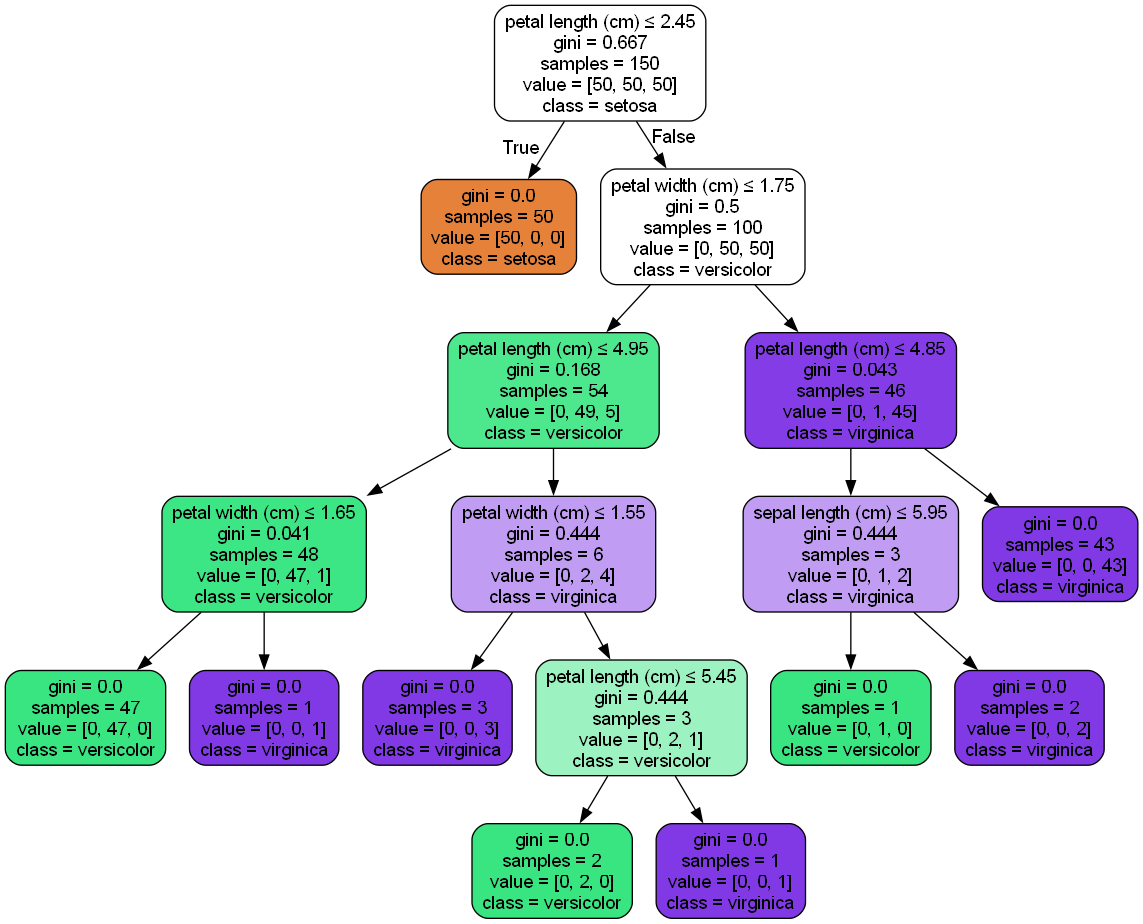

In [4]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Export decision tree to DOT format
dot_data = export_graphviz(clf, 
                            out_file=None,  # Return string instead of writing to file
                            feature_names=iris.feature_names,  
                            class_names=iris.target_names,  
                            filled=True, 
                            rounded=True,
                            special_characters=True)

# Create graphviz object from DOT data
graph = graphviz.Source(dot_data)

# Display the image
Image(graph.pipe(format='png'))



* Στα δένδρα αποφάσεων υπάρχουν δύο τρόποι μέτρησης της ομοιογένειας των στοιχείων ενός κόμβου:
    * `gini`
    * `entropy`
    
* Αυτές είναι υπερπαράμετροι.

* Ας τις δούμε σε ένα άλλο, πιο μεγάλο σύνολο δεδομένων.

* Τα δεδομένα, που επίσης περιλαμβάνονται στο scikit-learn, αφορούν είδος δασικής κάλυψης, με βάση διάφορα χαρακτηριστικά.

In [5]:
from sklearn.datasets import fetch_covtype

fcover = fetch_covtype(as_frame=True)

fcover.data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
fcover.target

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int32

* Θα κρατήσουμε το 25% για έλεγχο.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fcover.data, fcover.target,
                                                   test_size=0.25, random_state=0)

* Θα αναζητήσουμε το καλύτερο κριτήριο, όπως και το βέλτιστο βάθος.

* Προσοχή, τα δεδομένα είναι πολλά, το παρακάτω θα χρειαστεί χρόνο!

In [8]:
from sklearn.model_selection import GridSearchCV

max_depth = list(range(10, 20+1))
max_depth.append(None)

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': max_depth
}

clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=-1)

clf = clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeClassifier(criterion='entropy')
{'criterion': 'entropy', 'max_depth': None}


* Ως συνήθως, μπορούμε να δούμε την αναφορά ταξινόμησης.

In [9]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94     52943
           2       0.95      0.95      0.95     70897
           3       0.93      0.93      0.93      8890
           4       0.85      0.82      0.83       704
           5       0.84      0.85      0.84      2340
           6       0.89      0.88      0.89      4384
           7       0.95      0.95      0.95      5095

    accuracy                           0.94    145253
   macro avg       0.91      0.90      0.91    145253
weighted avg       0.94      0.94      0.94    145253

